<a href="https://colab.research.google.com/github/natalied0000/machine_learning_may2022/blob/main/machine_learning_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [151]:
import pandas as pd
import numpy as np

df = pd.read_csv('/TWTR.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-28,31.500000,32.680000,31.320000,31.600000,31.600000,37254900
2020-05-29,31.559999,31.610001,30.290001,30.969999,30.969999,39413300
2020-06-01,31.059999,32.099998,30.840000,31.889999,31.889999,14583600
2020-06-02,32.189999,32.419998,31.610001,32.259998,32.259998,15318400
2020-06-03,32.610001,35.040001,32.439999,34.880001,34.880001,28396300


In [152]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,37.770000,38.000000,36.939999,37.860001,37.860001,13601300
2022-05-24,36.939999,37.200001,35.400002,35.759998,35.759998,22663000
2022-05-25,36.060001,37.369999,36.020000,37.160000,37.160000,23262800
2022-05-26,38.520000,39.590000,38.230000,39.520000,39.520000,22968400
2022-05-27,39.570000,40.770000,39.480000,40.169998,40.169998,16768800


In [153]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import time

plt.rcParams['figure.figsize']=(22,12)





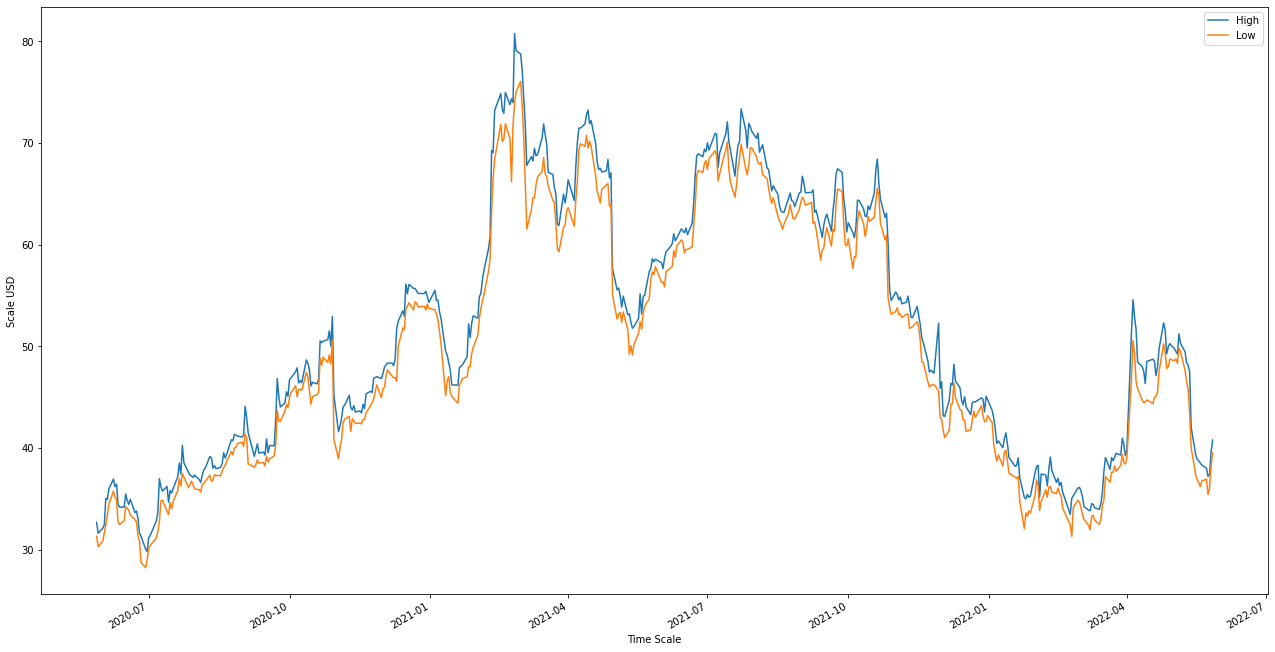

In [154]:
x=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df.index.values]
plt.plot(x, df['High'], label='High')
plt.plot(x,df['Low'], label='Low')


plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [156]:
target_y = df['Close']

X_feat = df.iloc[:,0:3]

In [158]:
sc = StandardScaler()

X_ft = sc.fit_transform(X_feat.values)
X_ft= pd.DataFrame(columns=X_feat.columns, data=X_ft, index =X_feat.index)

In [159]:
def lstm_split(data, n_steps):
  X,y = [],[]
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])

    return np.array(X), np.array(y)

In [183]:
X1,y1 = lstm_split(df.values, n_steps=2)

train_split=0.8
split_idx=int(np.ceil(len(X1)*train_split))
date_index = df.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(1, 2, 5) (1, 2, 5) (0, 2, 5) (0,)


In [179]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 2, 32)             4864      
                                                                 
 dense_3 (Dense)             (None, 2, 1)              33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [180]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
1/1 - 1s - loss: 1553407529713664.0000 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1553407529713664.0000 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 1553407529713664.0000 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 1553407261278208.0000 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 1553407261278208.0000 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 1553407261278208.0000 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 1553407261278208.0000 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 1553406992842752.0000 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 1553406992842752.0000 - 15ms/epoch - 15ms/step
Epoch 10/100
1/1 - 0s - loss: 1553406992842752.0000 - 10ms/epoch - 10ms/step
Epoch 11/100
1/1 - 0s - loss: 1553406992842752.0000 - 9ms/epoch - 9ms/step
Epoch 12/100
1/1 - 0s - loss: 1553406992842752.0000 - 9ms/epoch - 9ms/step
Epoch 13/100
1/1 - 0s - loss: 1553406724407296.0000 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss

In [185]:

# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

y_pred = lstm.predict(X_test)

ValueError: ignored